In [105]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
df=pd.read_csv("seattle-weather.csv")

In [107]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [108]:
df['weather'].unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

In [109]:
print(df.shape)

(1461, 6)


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [111]:
df.isnull().sum()


date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [112]:
from sklearn.preprocessing import LabelEncoder
df['weather']=LabelEncoder().fit_transform(df['weather'])

In [113]:
df['date']=df['date'].str.replace("-","").astype(int)



<Axes: >

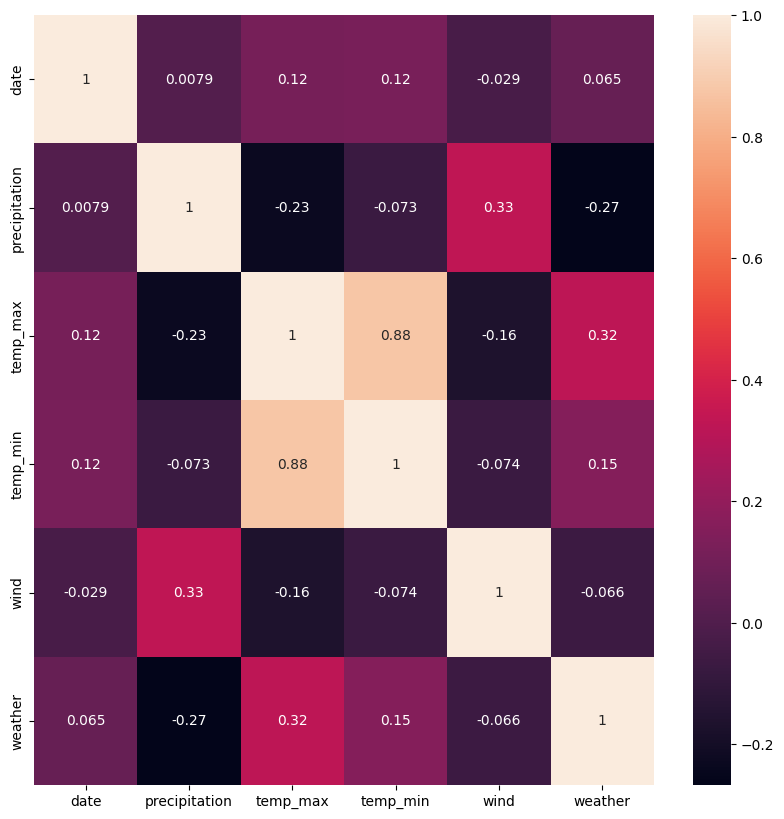

In [114]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [115]:
from sklearn.model_selection import train_test_split
features=["date","precipitation", "temp_max", "temp_min", "wind"]
X=df[features]
y=df.weather
train_X, test_X, train_y, test_y = train_test_split(X, y,random_state = 0)

In [116]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model1=DecisionTreeClassifier(random_state=1)
model1.fit(train_X, train_y)
pred1=model1.predict(test_X)
print("accuracy_score: %f" %(accuracy_score(test_y, pred1)))

accuracy_score: 0.827869


In [117]:
from sklearn.ensemble import RandomForestClassifier

model2=RandomForestClassifier(random_state=1)
model2.fit(train_X, train_ys)
pred2=model2.predict(test_X)
print("accuracy_score: %f" %(accuracy_score(test_y, pred2)))

accuracy_score: 0.827869


In [118]:
# custom predsss
inputer=np.array([20120101,0.0,12.8,5.0,4.7])
y_pred=model2.predict(inputer.reshape(1,-1))[0]
if y_pred==0:
    print("Drizzle")
elif y_pred==1:
    print("Fog")
elif y_pred==2:
    print("Rain")
elif y_pred==3:
    print("Snow")
elif y_pred==4:
    print("Sun")

Drizzle


c:\Users\rkdat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [119]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,20120101,0.0,12.8,5.0,4.7,0
1,20120102,10.9,10.6,2.8,4.5,2
2,20120103,0.8,11.7,7.2,2.3,2
3,20120104,20.3,12.2,5.6,4.7,2
4,20120105,1.3,8.9,2.8,6.1,2


In [122]:
import pickle
arr=pickle.dump(model2,open("model.pkl","wb"))